In [2]:
import pandas as pd
frequency_df = pd.read_csv('frequency_of_the_instagram_posts.csv')
frequency_df.head()

,Political Party,Username,Post Date
0,PS,partido_socialista,2024-03-08 23:59:01
1,PS,partido_socialista,2024-03-08 23:36:30
2,PS,partido_socialista,2024-03-08 23:01:58
3,PS,partido_socialista,2024-03-08 22:36:24
4,PS,partido_socialista,2024-03-08 22:01:47


In [3]:
# To see the weekly frequency of posts for each party
import pandas as pd

# Convert 'Post Date' column to datetime format
frequency_df['Post Date'] = pd.to_datetime(frequency_df['Post Date'])

# Sort the DataFrame by 'Post Date'
frequency_df.sort_values(by='Post Date', inplace=True)

# Calculate the time difference between consecutive posts
frequency_df['Time Difference'] = frequency_df.groupby('Political Party')['Post Date'].diff()

# Drop the first row for each party (since there's no time difference)
frequency_df.dropna(subset=['Time Difference'], inplace=True)

# Convert time differences to hours for easier analysis
frequency_df['Frequency of posts (weekly)'] = frequency_df['Time Difference'] / pd.Timedelta(hours=1)

avg_frequency_posts_df=frequency_df.groupby('Political Party')['Frequency of posts (weekly)'].mean()

avg_frequency_posts_df

Political Party
B.E.                   7.044782
CH                     4.661048
IL                     7.989728
L                      4.467317
PAN                   12.833861
PCP                    3.568974
PPD/PSD.CDS-PP.PPM     5.636428
PS                     5.837257
Name: Frequency of posts (weekly), dtype: float64

In [4]:
import pandas as pd
vote_intention_df = pd.read_excel('vote_intention_by_party.xlsx')
vote_intention_df.head(20)

,Political Party,Votes,Time Period
0,PPD/PSD.CDS-PP.PPM,0.0,"Nov 14 to Nov 17, 2023"
1,PS,23.6,"Nov 14 to Nov 17, 2023"
2,CH,13.5,"Nov 14 to Nov 17, 2023"
3,IL,8.4,"Nov 14 to Nov 17, 2023"
4,B.E.,9.5,"Nov 14 to Nov 17, 2023"
5,L,3.0,"Nov 14 to Nov 17, 2023"
6,PAN,4.4,"Nov 14 to Nov 17, 2023"
7,PCP,3.2,"Nov 14 to Nov 17, 2023"
8,PSD,21.9,"Nov 14 to Nov 17, 2023"
9,CDS,1.9,"Nov 14 to Nov 17, 2023"


In [5]:
import pandas as pd

# Group by 'Party' and calculate the average votes for each party
avg_vote_intention_df = vote_intention_df.groupby('Political Party').agg({'Votes': 'mean'}).reset_index()

# Rename 'Votes' column to 'Average Votes'
avg_vote_intention_df = avg_vote_intention_df.rename(columns={'Votes': 'Average Votes'})

# Remove rows where 'Political Party' is 'CDS', 'PSD' or 'Undecided'
avg_vote_intention_df = avg_vote_intention_df[~avg_vote_intention_df['Political Party'].isin(['CDS', 'PSD', 'Undecided'])]

avg_vote_intention_df.head(20)

,Political Party,Average Votes
0,B.E.,6.045455
2,CH,15.627273
3,IL,5.781818
4,L,2.727273
5,PAN,2.436364
6,PCP,2.681818
7,PPD/PSD.CDS-PP.PPM,22.972727
8,PS,26.481818


In [6]:
# Merge the two DataFrames on the 'Political Party' column
merged_df = pd.merge(avg_frequency_posts_df, avg_vote_intention_df, on='Political Party', how='left')

merged_df.head(20)

,Political Party,Frequency of posts (weekly),Average Votes
0,B.E.,7.044782,6.045455
1,CH,4.661048,15.627273
2,IL,7.989728,5.781818
3,L,4.467317,2.727273
4,PAN,12.833861,2.436364
5,PCP,3.568974,2.681818
6,PPD/PSD.CDS-PP.PPM,5.636428,22.972727
7,PS,5.837257,26.481818


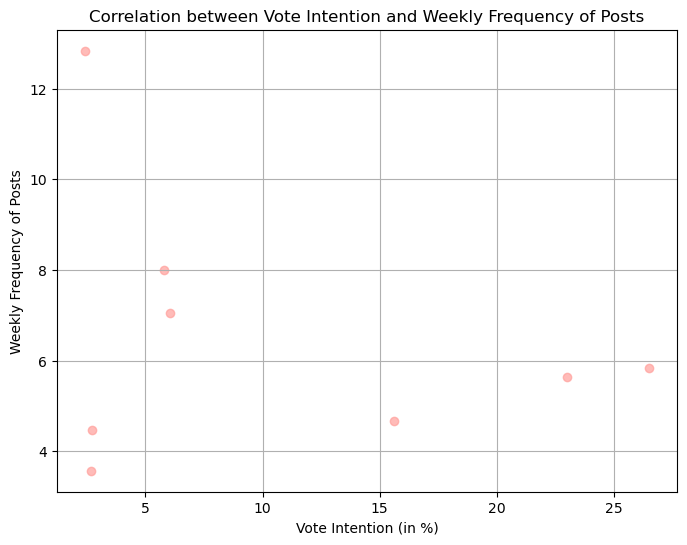

In [11]:
# Scatter plot of the correlation between Votes and Weekly Frequency of Posts
import matplotlib.pyplot as plt
import seaborn as sns

pastel_color = sns.color_palette('pastel')[3]

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Average Votes'], merged_df['Frequency of posts (weekly)'], color=pastel_color, alpha=0.7)
plt.title('Correlation between Vote Intention and Weekly Frequency of Posts')
plt.xlabel('Vote Intention (in %)')
plt.ylabel('Weekly Frequency of Posts')
plt.grid(True)
plt.show()

In [10]:
# Calculate correlation coefficient between 'Votes' and 'Time Difference (hours)'
correlation = merged_df['Frequency of posts (weekly)'].corr(merged_df['Average Votes'])

print("Correlation coefficient between the Weekly Frequency of Instagram Posts and Vote Intention:", correlation)

Correlation coefficient between the Weekly Frequency of Instagram Posts and Vote Intention: -0.2633769373566716


In [8]:
avg_frequency_posts_df

Political Party
B.E.                   7.044782
CH                     4.661048
IL                     7.989728
L                      4.467317
PAN                   12.833861
PCP                    3.568974
PPD/PSD.CDS-PP.PPM     5.636428
PS                     5.837257
Name: Frequency of posts (weekly), dtype: float64

In [9]:
import pandas as pd
to_vote_or_no_df = pd.read_excel('intention_to_vote_or_not_vote.xlsx')
to_vote_or_no_df.head()

,Intention,Respondents (in %)
0,I certainly will not vote,2
1,I do not intend to vote,2
2,I do not know if I will vote,4
3,"In principle, I will vote",10
4,I certainly will vote,82
